In [86]:
import sys
sys.path.append('../python')

(1e-21, 1e-16)

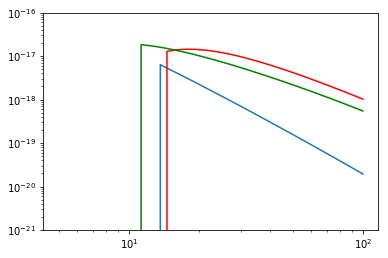

In [109]:
import cool_tigress as ct
A = ct.EnumAtom
ph = ct.Photx()
E = np.logspace(np.log10(5.0), 2, 2000)
plt.plot(E, ph.get_sigma(A.H, A.H.value, E))
#plt.plot(E, ph.get_sigma(A.He, A.He.value, E))
plt.plot(E, ph.get_sigma(A.N, A.N.value, E), 'r-')
plt.plot(E, ph.get_sigma(A.C, A.C.value, E), 'g-')
#plt.plot(E, ph.get_sigma(A.O, A.O.value, E) + ph.get_sigma(A.O, A.O.value-6, E))
#plt.plot(E, ph.get_sigma(A.C, A.C.value, E) + ph.get_sigma(A.C, A.C.value-4, E))
#plt.plot(E, ph.get_sigma(A.S, A.S.value, E), 'r-')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-21, 1e-16)

(6e-13, 5e-11)

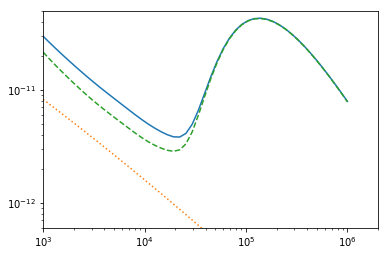

In [100]:
r = ct.RecRate()
Z = ct.EnumAtom.S.value
ax = r.plt_rec_rate(Z=Z, N=Z-2)
ax.set_xlim(1e3, 2e6)
ax.set_ylim(6e-13, 5e-11)

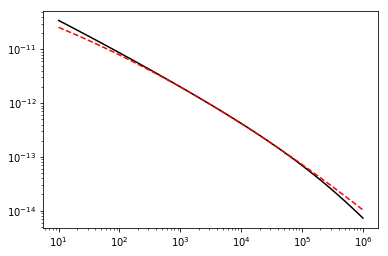

In [85]:
def alphaH(T):
    B = 0.7472
    T0 = 2.965
    T1 = 7.001e5
    return 8.318e-11/(np.sqrt(T/T0)*(1.0 + np.sqrt(T/T0))**(1.0 - B)*(1.0 + np.sqrt(T/T1))**(1.0 + B))

T = np.logspace(1, 6)
plt.loglog(T, alphaH(T), 'k')
#plt.loglog(T, 2.59e-13*(T/1e4)**-0.7, 'k--')
alphaA = 4.17e-13*(T/1e4)**(-0.721 - 0.018*np.log(T/1e4))
alphaB = 2.59e-13*(T/1e4)**(-0.833 - 0.035*np.log(T/1e4))
plt.loglog(T, alphaA, 'r--')
#plt.loglog(T, 2.59e-13*(T/1e4)**(-0.833 - 0.035*np.log(T/1e4)), 'g--')
#plt.ylim(1e-18,1e-8)

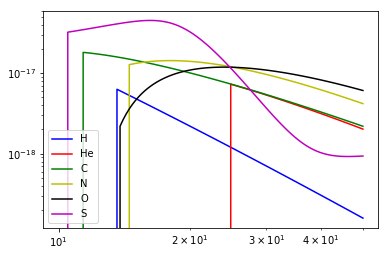

In [2]:
v = PhotVerner96()
E = np.logspace(1.0, np.log10(50.0), 100)
sigma_HI = v.sigma(1, 1, E)
sigma_HeI = v.sigma(2, 2, E)
sigma_CI = v.sigma(6, 6, E)
sigma_NI = v.sigma(7, 7, E)
sigma_OI = v.sigma(8, 8, E)
sigma_SI = v.sigma(16, 16, E)

plt.plot(E, sigma_HI, 'b-', label='H')
plt.plot(E, sigma_HeI, 'r-', label='He')
plt.plot(E, sigma_CI, 'g-', label='C')
plt.plot(E, sigma_NI, 'y-', label='N')
plt.plot(E, sigma_OI, 'k-', label='O')
plt.plot(E, sigma_SI, 'm-', label='S')
plt.yscale('log')
plt.xscale('log')
plt.legend()

## H Collisional ionization rate comparison

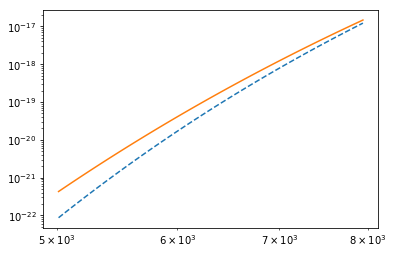

In [103]:
T = np.logspace(3.7, 3.9)
lnTe = np.log(T/1.160e4)
k_Hplus_e = lambda T: 2.753e-14*(315614.0/T)**1.5 * \
    (1.0 + (115188.0/T)**0.407)**(-2.242)

kcoll = lambda T: 5.84e-11*np.sqrt(T)*np.exp(-157821.5/T)
kcoll2 = lambda lnTe: np.exp(-3.271396786e1 + (1.35365560e1 + (- 5.73932875 + 
                (1.56315498 + (- 2.877056e-1 + (3.48255977e-2 + (- 2.63197617e-3 +
                (1.11954395e-4 + (-2.03914985e-6)
*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)
plt.loglog(T, kcoll(T), '--')
plt.loglog(T, kcoll2(lnTe))
#plt.loglog(T, k_Hplus_e(T))
#plt.ylim(bottom=1e-30)